In [1]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/historical_transactions.csv')

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [39]:
#looks like a ordinal variable - numerical that has to be considered as a categorical one 
df['installments'].value_counts(dropna=False)

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

In [40]:
df['authorized_flag'].value_counts(dropna=False)

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

In [41]:
#some categories have been overly represented. maybe frequency encoding would make sense here?
df['merchant_category_id'].value_counts(dropna=False)

705    5554009
307    3057930
278    2254227
80     1929413
367    1608239
        ...   
311          1
322          1
882          1
86           1
687          1
Name: merchant_category_id, Length: 327, dtype: int64

In [42]:
#month_lag. What role does month_lag play in affecting the score would help immensely re how to encode it

#in this context: -2 is smaller and better compared to -11. the question becomes what if a customer has both 
#-2 and -11? if max lag is important to the context then go with max of the value or if max or skewed values affect
#negatively then go with moderate representation, i.e., median

df['month_lag'].value_counts(dropna=False)

-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
-11    1007878
-12     791973
-13     689097
Name: month_lag, dtype: int64

In [43]:
df['category_2'].value_counts(dropna=False)

1.0    15177199
3.0     3911795
5.0     3725915
NaN     2652864
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [44]:
df['category_3'].value_counts(dropna=False)

A      15411747
B      11677522
C       1844933
NaN      178159
Name: category_3, dtype: int64

In [45]:
df['category_1'].value_counts(dropna=False)

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [ ]:
The 'purchase_amount' looks like some kind of transformed values. Why there are negative values - compared to what?

In [7]:



df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [33]:
df_sample_plot=df[:100000]

In [34]:
df_sample_plot.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [35]:
df_sample_plot['purchase_date']=df_sample_plot['purchase_date'].dt.year

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_sample_plot['purchase_date'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: purchase_date, dtype: int64

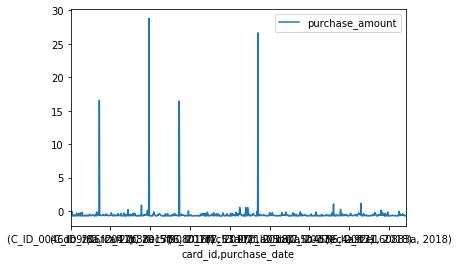

In [37]:

groups = df_sample_plot.groupby(['card_id','purchase_date'])['purchase_amount'].mean()
groups.plot(legend=True)

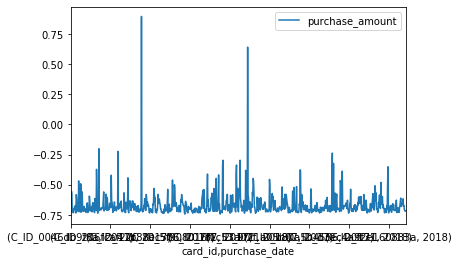

In [38]:
#trying the above plot using median because average is skewing the plot
groups_median = df_sample_plot.groupby(['card_id','purchase_date'])['purchase_amount'].median()
groups_median.plot(legend=True)

#As can be seen median reflects both positive and negative values in a better way

card_id
C_ID_0046db9f8a    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_011b0d9794    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_01904d743d    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_01b098ff01    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_02c2ed9fc0    AxesSubplot(0.125,0.125;0.775x0.755)
                                   ...                 
C_ID_fd5d1d036a    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_fe2cf74a3c    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_fe4dd0d9dd    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_fe97da1633    AxesSubplot(0.125,0.125;0.775x0.755)
C_ID_feaacc0f2e    AxesSubplot(0.125,0.125;0.775x0.755)
Name: purchase_amount, Length: 463, dtype: object

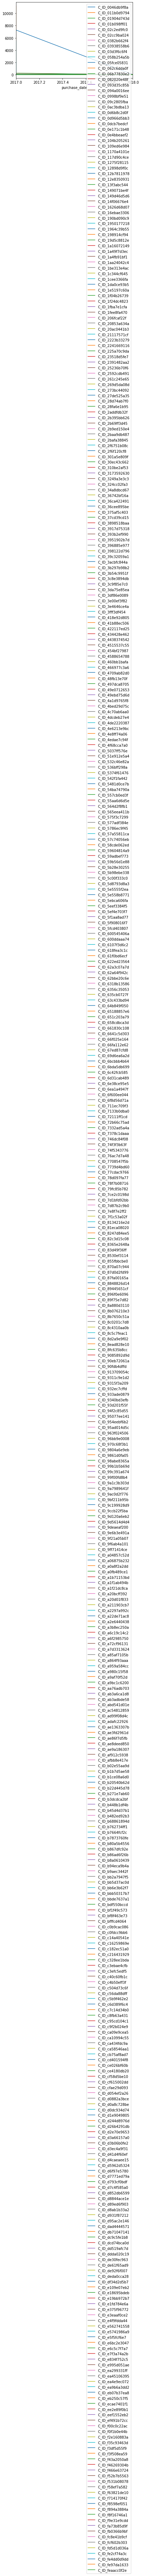

In [46]:
df_sample_plot.set_index('purchase_date', inplace=True)
df_sample_plot.groupby('card_id')['purchase_amount'].plot(legend=True)

In [47]:
df['purchase_amount'].value_counts(dropna=False)

-0.671775     687283
-0.716855     600414
-0.701828     510925
-0.731881     417335
-0.596643     389066
               ...  
 23.065906         1
 2.941214          1
 19.409655         1
 9.262252          1
 7.698503          1
Name: purchase_amount, Length: 215014, dtype: int64

In [48]:
max(df['purchase_amount'])

6010603.9717525

In [49]:
min(df['purchase_amount'])

-0.7469078

In [56]:
df_30000=pd.DataFrame(df.loc[df['purchase_amount']>30000, 'purchase_amount'])

In [57]:
df_30000.head()

,purchase_amount
766012,87155.460339
939394,51495.728348
2130976,64763.582538
2326408,40693.021759
2361254,46583.846921


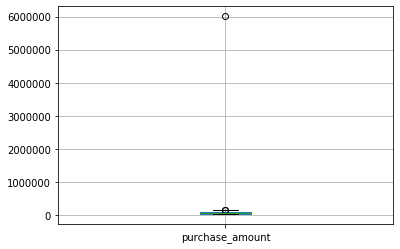

In [58]:
#looks like values above 1 million can be considered as outliers
df_30000.boxplot(return_type='axes');

In [60]:
df_30000['purchase_amount'].value_counts(dropna=False)

4.132491e+04    2
1.347588e+05    1
6.011040e+04    1
6.008965e+04    1
5.149573e+04    1
               ..
1.357661e+05    1
9.767796e+04    1
6.010604e+06    1
3.607657e+04    1
7.514659e+04    1
Name: purchase_amount, Length: 111, dtype: int64

In [61]:
df_30000_1=pd.DataFrame(df.loc[df['purchase_amount']>1000000, 'purchase_amount'])

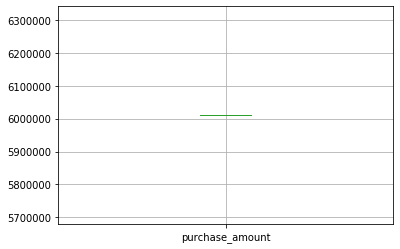

In [62]:
df_30000_1.boxplot(return_type='axes');

In [64]:
There is only one value above a million i.e., 6 million - can be considered as an outlier and can be dropped
df_30000_1['purchase_amount'].value_counts(dropna=False)

6.010604e+06    1
Name: purchase_amount, dtype: int64

In [74]:
df_30000_2=pd.DataFrame(df.loc[(df['purchase_amount']<1000000) & (df['purchase_amount']>500000), 'purchase_amount'])

In [75]:
there are no values between 500000 and 1000000
df.loc[(df['purchase_amount']<1000000) & (df['purchase_amount']>500000), 'purchase_amount']

Series([], Name: purchase_amount, dtype: float64)

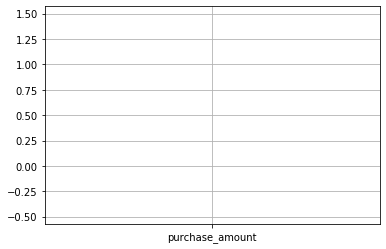

In [76]:
df_30000_2.boxplot(return_type='axes');

In [77]:
df_30000_2['purchase_amount'].value_counts(dropna=False)

Series([], Name: purchase_amount, dtype: int64)

In [78]:
df_30000_3=pd.DataFrame(df.loc[(df['purchase_amount']<500000) & (df['purchase_amount']>100000), 'purchase_amount'])

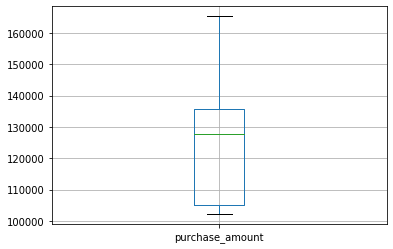

In [79]:
df_30000_3.boxplot(return_type='axes');

In [80]:
df_30000_3['purchase_amount'].value_counts(dropna=False)

134758.832268    1
105187.467554    1
147260.577576    1
138245.020225    1
120215.111402    1
135766.055642    1
105186.519652    1
102185.299350    1
127731.548758    1
165298.745751    1
135241.475652    1
119919.568931    1
105039.700804    1
Name: purchase_amount, dtype: int64

In [105]:
len(df_30000_3)

13

In [81]:
df_4=pd.DataFrame(df.loc[(df['purchase_amount']<100000) & (df['purchase_amount']>10000), 'purchase_amount'])

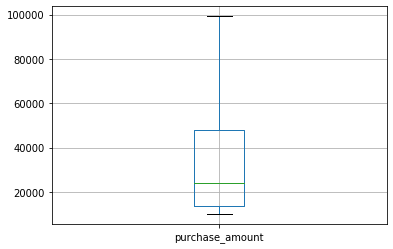

In [82]:
as can be seen 75% of the values are below 50000
df_4.boxplot(return_type='axes');

In [83]:
df_4['purchase_amount'].value_counts(dropna=False)

28557.291564    2
41324.906475    2
30054.671263    1
11119.278528    1
23301.564628    1
               ..
82648.827000    1
12024.682018    1
11278.560124    1
33066.209159    1
19538.241617    1
Name: purchase_amount, Length: 230, dtype: int64

In [84]:
df_5=pd.DataFrame(df.loc[(df['purchase_amount']>0) & (df['purchase_amount']<10000), 'purchase_amount'])

In [85]:
df_5['purchase_amount'].value_counts(dropna=False)

0.004418     29888
0.755743     21879
0.154683     15642
0.304948     13036
0.455213     10125
             ...  
8.438573         1
2.469803         1
11.489436        1
1.923018         1
3.718461         1
Name: purchase_amount, Length: 165063, dtype: int64

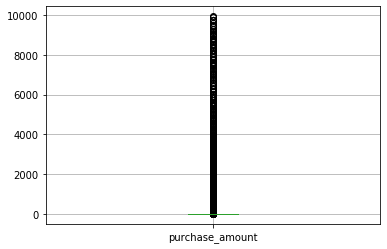

In [86]:
df_5.boxplot(return_type='axes');

In [88]:
df_6=pd.DataFrame(df.loc[df['purchase_amount']<0, 'purchase_amount'])

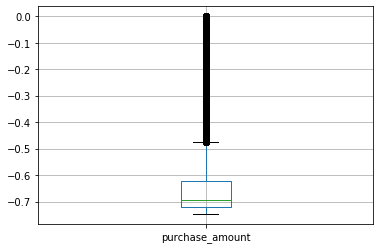

In [89]:
df_6.boxplot(return_type='axes');

In [98]:
df_7=pd.DataFrame(df.loc[df['purchase_amount']<0, ['purchase_date', 'purchase_amount']])

In [99]:
df_7.head()

,purchase_date,purchase_amount
0,2017-06-25 15:33:07,-0.703331
1,2017-07-15 12:10:45,-0.733128
2,2017-08-09 22:04:29,-0.720386
3,2017-09-02 10:06:26,-0.735352
4,2017-03-10 01:14:19,-0.722865


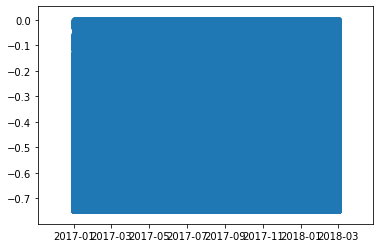

In [100]:
plt.scatter(df_7['purchase_date'], df_7['purchase_amount'])

In [104]:
len(df_7)

28036884

In [101]:
df_8=pd.DataFrame(df.loc[df['purchase_amount']<10000, 'purchase_amount'])

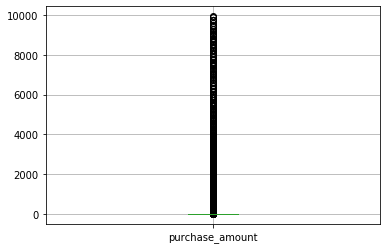

In [102]:
df_8.boxplot(return_type='axes');

In [103]:
len(df_8)

29112115

In [ ]:
what is clear so far?

there are no values between 500000 and 1000000

There is only one value above a million i.e., 6 million - can be considered as an outlier and can be dropped

there are 13 values between 100000 and 500000 so this can be dropped as well

delete all the values where purchase_amount>500000

include all the values of purchase_amount that are less than or equal to 100000   --- conclusion (might differ based on the test and train sets)

but wait did you check the test and train dataset as well? - good point!

In [106]:
df_train=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/train.csv')

In [107]:
len(df_train)

201917

In [110]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
because there is no purchase_amount in train and test sets it is safe to drop the values especially there are not like
a million values above 100000 in purchase amount.